In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("water.csv")

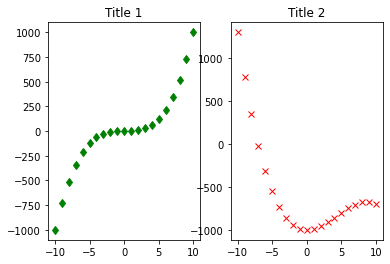

In [9]:
x = range(-10,11)
y = np.power(x, 3)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y, 'gd')
ax[0].set_title('Title 1')
ax[1].set_title('Title 2')

y2 = 13*np.power(x,2) - y - 1000
ax[1].plot(x, y2, 'rx')

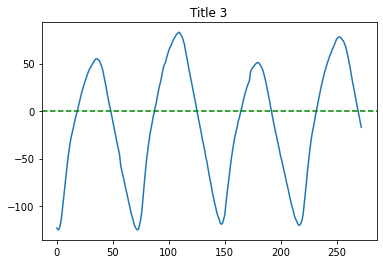

In [10]:
fig, ax = plt.subplots()
df['height'].plot(ax=ax)
ax.set_title("Title 3")
ax.axhline(0, linestyle='--', color='green')

In [12]:
df = pd.read_csv('weather.csv')
df.head()

,MONTH,DAY,TIME,TEMP,PRESSURE
0,1,1,1,6.8,10207
1,1,1,2,5.8,10214
2,1,1,3,5.7,10220
3,1,1,4,6.0,10225
4,1,1,5,4.5,10230


In [13]:
days = df[df['MONTH'].isin([1,7]) & (df['DAY'] == 1)].drop(columns='DAY')
days = days.pivot(columns='MONTH', index='TIME')
days.head()

TEMP       PRESSURE       
MONTH    1     7        1      7
TIME                            
1      6.8  16.3    10207  10100
2      5.8  16.5    10214  10099
3      5.7  16.3    10220  10098
4      6.0  16.5    10225  10096
5      4.5  16.7    10230  10098

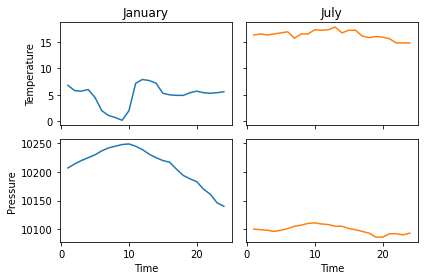

In [22]:
fig, ax, = plt.subplots(2,2, sharey='row', sharex='col')
days['TEMP'].plot(subplots=True, ax=ax[0], legend=False)
days['PRESSURE'].plot(subplots=True, ax=ax[1], legend=False);
ax[0][0].set_ylabel("Temperature")
ax[0][0].set_title("January")
ax[0][1].set_title("July")
ax[1][0].set_ylabel("Pressure")
ax[1][0].set_xlabel("Time")
ax[1][1].set_xlabel("Time")
fig.tight_layout()

In [32]:
df = pd.read_csv('sales.csv', parse_dates=['Date'])
df.head()

,Date,Amount,Product
0,2017-01-20,5411,b
1,2017-02-22,5000,c
2,2017-03-01,7260,a
3,2017-03-14,2117,c
4,2017-04-15,7516,b


In [33]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Amount,Product,Month
0,2017-01-20,5411,b,1
1,2017-02-22,5000,c,2
2,2017-03-01,7260,a,3
3,2017-03-14,2117,c,3
4,2017-04-15,7516,b,4


In [36]:
g = df.groupby(['Month', 'Product'])['Amount'].sum()
g = g.unstack()
revenue = g.fillna(0).cumsum()
revenue

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,13794.0,9258.0,6740.0
3,21054.0,9258.0,8857.0
4,32670.0,22479.0,14297.0
5,39789.0,22479.0,17287.0
6,50860.0,22479.0,24463.0
7,55060.0,38452.0,27364.0
8,65402.0,38452.0,34026.0
9,65402.0,38452.0,34686.0


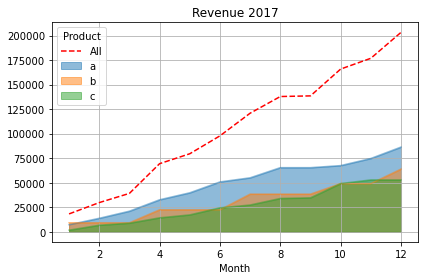

In [45]:
fig, ax = plt.subplots()
total_revenue = df.groupby('Month')['Amount'].sum().cumsum()
total_revenue.plot(ax=ax, style='r--', legend=True, label='All')
revenue.plot.area(title='Revenue 2017', ax=ax, stacked=False, grid=True)
fig.tight_layout()

In [47]:
df = pd.read_csv('athletes.csv')
top = df.groupby('nationality')[['gold','silver', 'bronze']].sum().sort_values('gold', ascending=False).head(10)
top

,gold,silver,bronze
nationality,,,
USA,139,54,71
GBR,64,55,26
RUS,52,29,34
GER,49,44,67
CHN,46,30,37
BRA,37,8,6
AUS,23,34,25
ARG,21,1,0
FRA,20,54,21


<AxesSubplot:xlabel='nationality'>

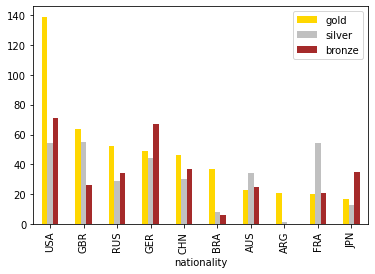

In [48]:
fig, ax = plt.subplots()
top.plot.bar(color=['gold', 'silver', 'brown'], ax=ax)